# Regression model selection project

The dataser for this project was obtained from the UCI machine learning repository. The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011). The features of this dataset are hourly average ambient variables that include: <br><br>
AT: ambient temperature<br>
AP: ambient pressure<br>
RH: relative humidity<br>
V: exhaust vacuum<br>
<br>Which are used to predict the continual target variable EP that consists of the net hourly electrical energy output of the plant



In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
df = pd.read_excel('Folds5x2_pp.xlsx')
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


We can see that the dataset consists of 9568 observations. Now we check if the data types were assigned correctly.

In [238]:
df.dtypes

AT    float64
V     float64
AP    float64
RH    float64
PE    float64
dtype: object

We can see that the data types are float for all the variables, so no correction is needed. Now we want to see some descriptive values of the variables.

In [239]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


As we can see drom the count, there are no missing values in any of the columns, and all the max and min values seem to be realistic. We are going to plot the distribution of the variables to gain more insight.

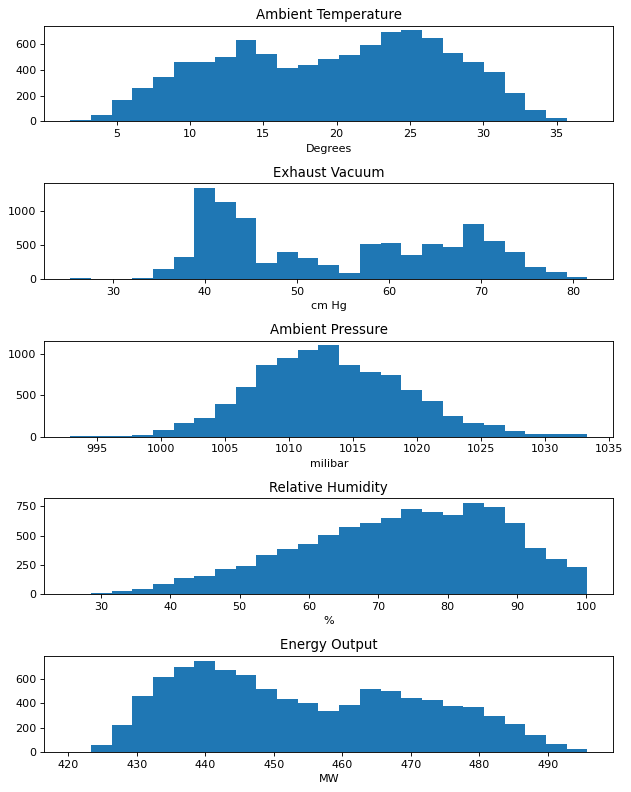

In [240]:
figure(figsize=(8, 10), dpi=80)
plt.subplot(5, 1, 1)
plt.hist(df['AT'], 25)
plt.xlabel('Degrees')
plt.title('Ambient Temperature')
plt.subplot(5, 1, 2)
plt.hist(df['V'], 25)
plt.xlabel('cm Hg')
plt.title('Exhaust Vacuum')
plt.subplot(5, 1, 3)
plt.hist(df['AP'], 25)
plt.xlabel('milibar')
plt.title('Ambient Pressure')
plt.subplot(5, 1, 4)
plt.hist(df['RH'], 25)
plt.xlabel('%')
plt.title('Relative Humidity')
plt.subplot(5, 1, 5)
plt.hist(df['PE'], 25)
plt.xlabel('MW')
plt.title('Energy Output')
plt.tight_layout()  # Adjusts spacing to prevent overlap
plt.show()

We can see that Ambient Temperature, Exhaust Vacuum, and Energy Output show bimodal distributions whereas Ambient Pressure and Relative Humidity have normal distributions, with RH having an evident negative skew.

Now we want to explore the correlation between variables with a correlation heatmap

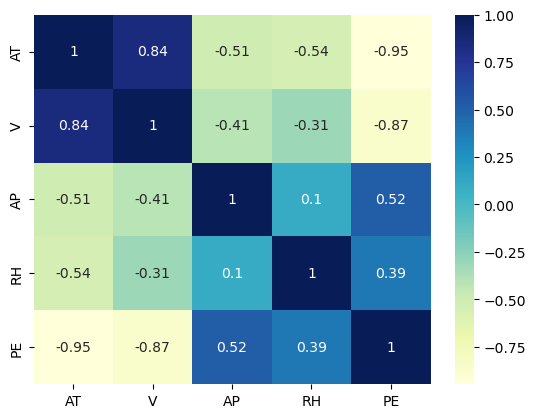

In [241]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

We can see a strong positive correlation for the Exaust Vacuum with respect to Ambient Temperature, and a strong negative correlation of these two variables with respect to the Energy Output, these three variables were the ones with the more similar distribution in their observations. Now to explore the significance of the independent variables with respect to the dependent variable we are going to obtain the p-value for each one of the features.

In [242]:
from scipy import stats
res = stats.pearsonr(df['AT'],df['PE'])
print('AT = ',res)
res = stats.pearsonr(df['V'],df['PE'])
print('V = ',res)
res = stats.pearsonr(df['AP'],df['PE'])
print('AP = ',res)
res = stats.pearsonr(df['RH'],df['PE'])
print('RH = ',res)


AT =  PearsonRResult(statistic=-0.9481284704167602, pvalue=0.0)
V =  PearsonRResult(statistic=-0.8697803096577874, pvalue=0.0)
AP =  PearsonRResult(statistic=0.5184290273615743, pvalue=0.0)
RH =  PearsonRResult(statistic=0.38979409979010193, pvalue=0.0)


We can see values of 0 for the p-value of the correlation of each one of the independent variables with respoect to the dependent variable, thus, all correlations are statistically significant in this case.

### Machine learning models

To start with the modeling of the data, we separate the independent variables from the dependent variable.

In [243]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

We split the data into training and test sets, in this case, using 80% as the training set and the remainding 20% as the test set

In [244]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

We scale the variables for the models that need normalization.

In [245]:
from sklearn.preprocessing import StandardScaler
y_train_sc = y_train.reshape(len(y_train),1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_sc = sc_X.fit_transform(X_train)
y_train_sc = sc_y.fit_transform(y_train_sc)

### Multiple linear regression

In [246]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
regressorlr = LinearRegression()
regressorlr.fit(X_train, y_train)
y_pred_lr = regressorlr.predict(X_test)
print('r2 score for multiple linear regression =',r2_score(y_test,y_pred_lr))

r2 score for multiple linear regression = 0.9325315554761303


### Polynomial Regression

In [273]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 7)
X_poly = poly_reg.fit_transform(X_train)
regressorpr = LinearRegression()
regressorpr.fit(X_poly, y_train)
y_pred_pr = regressorpr.predict(poly_reg.transform(X_test))
print('r2 score for polynomial regression =',r2_score(y_test,y_pred_pr))

r2 score for polynomial regression = 0.9488638953015057


We itarate over the order of the polynomial to see that the best value for r2 is found with a 7 degree polynomial regression

### Ridge Regression

In [261]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
parameters1=[{'alpha':[0.001,0.1,1,10,100,1000,10000,100000]}]
RR=Ridge()
Grid1 = GridSearchCV(RR,parameters1,cv=4)
Grid1.fit(X_train,y_train)
Grid1.best_estimator_


Ridge(alpha=100)

With this value of alpha we calculate y_pred and obtain the resulting r2 value

In [265]:
RR=Ridge(alpha=100)
RR.fit(X_train,y_train)
y_pred_rr=RR.predict(X_test)
print('r2 score for polynomial regression =',r2_score(y_test,y_pred_rr))

r2 score for polynomial regression = 0.9325278090061646


### Support Vector Machine Regression

In [278]:
from sklearn.svm import SVR
regressorsvm = SVR(kernel = 'rbf')
regressorsvm.fit(X_train_sc, y_train_sc.ravel())
y_pred_svm = sc_y.inverse_transform(regressorsvm.predict(sc_X.transform(X_test)).reshape(-1,1))
print('r2 score for suport vector machine regression =',r2_score(y_test,y_pred_svm))


r2 score for suport vector machine regression = 0.948078404998626


### Decission Tree Regression

In [249]:
from sklearn.tree import DecisionTreeRegressor
regressordt = DecisionTreeRegressor(random_state = 0)
regressordt.fit(X_train, y_train)
y_pred_dt = regressordt.predict(X_test)
print('r2 score for decission tree regressor =',r2_score(y_test,y_pred_dt))

r2 score for decission tree regressor = 0.922905874177941


### Random Forest Regression

We use a Grid Search with 4 fold cross validation to pick the optimal number of decission trees for the model

In [295]:
from sklearn.ensemble import RandomForestRegressor
regressorrf = RandomForestRegressor(random_state=0)
parameters2=[{'n_estimators':[100,200,300,400,500,600,700,800]}]
Grid2=GridSearchCV(regressorrf,parameters2,cv=4)
Grid2.fit(X_train, y_train)
print('Optimal number of trees = ',Grid2.best_estimator_)



Optimal number of trees =  RandomForestRegressor(n_estimators=500, random_state=0)


In [296]:
regressorrf = RandomForestRegressor(n_estimators = 500, random_state = 0)
regressorrf.fit(X_train, y_train)
y_pred_rf = regressorrf.predict(X_test)
print('r2 score for random forest regressor =',r2_score(y_test,y_pred_rf))

r2 score for random forest regressor = 0.9653381733569701


### Conclusion

For this dataset, the best performing model in terms of r squared to predict the power output in terms of the independent variables is the Random Forest Regression model with 500 trees. 